# What is COVID-19?

Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1 'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

The index cases of COVID-19 in Namibia were reported on 13 March 2020. This is of a Romanian couple that arrived on 11 March 2020 at the Hosea Kotako International Airport and presented themselves to a private medical practitioner when they started to feel sick. The doctor suspected Covid-19 and swabbed both for testing. The results came back positive on 13 March 2020. This report looks at predicting COVID-19 spread and determining the factors that affect the spread. This report is based on various regions around Namibia.

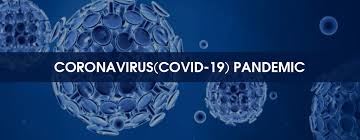

In [2]:
# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [78]:
# loading data right from the source:
death_df = pd.read_csv('time_series_covid_19_deaths_na.csv')
confirmed_df = pd.read_csv('time_series_covid_19_confirmed_na.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered_na.csv')
country_df = pd.read_csv('Covid_data_Nam.csv')

In [79]:
#confirmed_df.head()

,Region,Lat,Long_,1/1/2020,1/2/2020,1/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,...,9/21/2021,9/22/2021,9/23/2021,9/24/2021,9/25/2021,9/26/2021,9/27/2021,9/28/2021,9/29/2021,9/30/2021
0,Erongo,22.2566,15.4068,0,0,0,0,0,0,0,...,18222,18238,18240,18242,18252,18255,18255,18256,18260,18267
1,Hardap,24.2310,17.6689,0,0,0,0,0,0,0,...,7448,7457,7468,7481,7481,7488,7502,7505,7530,7543
2,Karas,26.8430,17.2903,0,0,0,0,0,0,0,...,7785,7787,7788,7789,7789,7789,7794,7799,7801,7805
3,Kavango East,18.1859,20.3459,0,0,0,0,0,0,0,...,5474,5478,5479,5479,5480,5480,5480,5480,5490,5491
4,Kavango West,18.1500,18.5500,0,0,0,0,0,0,0,...,637,639,639,639,639,639,639,639,639,639


In [80]:
#recovered_df.head()

,Region,Lat,Long_,1/1/2020,1/2/2020,1/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,...,9/21/2021,9/22/2021,9/23/2021,9/24/2021,9/25/2021,9/26/2021,9/27/2021,9/28/2021,9/29/2021,9/30/2021
0,Erongo,22.2566,15.4068,0,0,0,0,0,0,0,...,17740,17740,17740,17783,17783,17783,17783,17794,17798,17798
1,Hardap,24.2310,17.6689,0,0,0,0,0,0,0,...,7144,7158,7158,7161,7161,7161,7161,7161,7166,7177
2,Karas,26.8430,17.2903,0,0,0,0,0,0,0,...,7549,7549,7549,7549,7549,7549,7549,7549,7549,7549
3,Kavango East,18.1859,20.3459,0,0,0,0,0,0,0,...,5264,5268,5270,5270,5270,5270,5270,5270,5272,5283
4,Kavango West,18.1500,18.5500,0,0,0,0,0,0,0,...,610,610,611,611,611,611,611,611,611,611


In [81]:
#death_df.head()

,Region,Lat,Long_,1/1/2020,1/2/2020,1/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,...,9/21/2021,9/22/2021,9/23/2021,9/24/2021,9/25/2021,9/26/2021,9/27/2021,9/28/2021,9/29/2021,9/30/2021
0,Erongo,22.2566,15.4068,0,0,0,0,0,0,0,...,410,410,410,410,410,410,410,410,410,410
1,Hardap,24.2310,17.6689,0,0,0,0,0,0,0,...,257,257,257,257,257,257,257,257,257,257
2,Karas,26.8430,17.2903,0,0,0,0,0,0,0,...,145,145,145,145,145,145,145,146,147,147
3,Kavango East,18.1859,20.3459,0,0,0,0,0,0,0,...,195,195,195,195,195,195,195,195,195,195
4,Kavango West,18.1500,18.5500,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18


In [82]:
#country_df.head()

,Last_update,Region,Lat,Long_,Confirmed,Recovered,Active,Deaths,Non_Covid_deaths
0,9/30/2021,Erongo,22.2566,15.4068,18267,17798,54,410,5
1,9/30/2021,Hardap,24.2310,17.6689,7543,7177,109,257,0
2,9/30/2021,Karas,26.8430,17.2903,7805,7549,109,147,0
3,9/30/2021,Kavango East,18.1859,20.3459,5491,5283,12,195,1
4,9/30/2021,Kavango West,18.1500,18.5500,639,611,10,18,0


In [83]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [84]:
#country_df.head()

,last_update,region,lat,long_,confirmed,recovered,active,deaths,non_covid_deaths
0,9/30/2021,Erongo,22.2566,15.4068,18267,17798,54,410,5
1,9/30/2021,Hardap,24.2310,17.6689,7543,7177,109,257,0
2,9/30/2021,Karas,26.8430,17.2903,7805,7549,109,147,0
3,9/30/2021,Kavango East,18.1859,20.3459,5491,5283,12,195,1
4,9/30/2021,Kavango West,18.1500,18.5500,639,611,10,18,0


In [85]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [86]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

# COVID-19 Confirmed/Death/Recovered cases by regions

## Enter number of regions you want the data for

In [87]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 7] = r
    df1.iloc[:, 5 ] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='14')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='14', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [88]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

# Slide to check for the worst hit regions

In [89]:
# # plotting the worst hit regions

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="region", y="confirmed", size="confirmed", color="region",
               hover_name="region", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit regions",
    xaxis_title="Regions",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=14)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=14, description='n', max=42, min=-14), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

In [104]:
def plot_cases_of_a_region(Region):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if Region == 'Region' or Region == 'region':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['region'] == Region].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + Region,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

# Check the details of your Region or the Country

* Enter the name of your region(in capitalized format(e.g. Khomas)) and country for total cases

In [105]:
interact(plot_cases_of_a_region, Region='Region')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='Region', description='Region'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

# Regions - Confirmed cases

In [106]:
px.bar(
    sorted_country_df.head(14),
    x = "region",
    y = "confirmed",
    title= "Confirmed cases by Regions", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Regions - Confirmed Deaths

In [107]:
px.bar(
    sorted_country_df.head(14),
    x = "region",
    y = "deaths",
    title= "Death cases by Regions", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Recoveries by Region

In [108]:
px.bar(
    sorted_country_df.head(14),
    x = "region",
    y = "recovered",
    title= "Recovered cases by Region", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)